<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px">Привет! Меня зовут Миша, я буду проводить ревью на этом спринте. 
Мои комментарии и замечания далее по тексту помечены <font color='orange'>цветом и рамкой</font>. Постарайся учесть их в ходе выполнения дальнейших проектов. Удачи!</h7>

## Аналитика в Яндекс.Афише

#### Описание проекта
Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. 
- Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.

У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Вы изучите:
- как люди пользуются продуктом,
- когда они начинают покупать,
- сколько денег приносит каждый клиент
- когда клиент окупается.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
- Загрузите данные о визитах, заказах и расходах в переменные.
- Оптимизируйте данные для анализа.
- Убедитесь, что тип данных в каждой колонке

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv', sep = ',')
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
#заменим названия столбцов (приведем к нижнему регистру)
visits.columns = visits.columns.str.lower()
#переименуем колонки
visits.rename(columns={'end ts': 'end_ts', 'start ts': 'start_ts', 'source id': 'source_id'}, inplace=True)

In [4]:
#изменим формат данных в колонках начала и окончания сесиии
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M")
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M")
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

In [6]:
orders = pd.read_csv('/datasets/orders_log.csv', sep = ',')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
#заменим названия столбцов (приведем к нижнему регистру)
orders.columns = orders.columns.str.lower()
#переименуем колонки
orders.rename(columns={'buy ts': 'buy_ts'}, inplace=True)
#изменим тип данных в колонке buy_ts
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [8]:
costs = pd.read_csv('/datasets/costs.csv', sep = ',')
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
#изменим формат данных в колонке с датой
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M")
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### Вывод


Для анализа представлено три набора данных: visits, orders, costs. Проведена предобработка: названия столбцов приведены к нижнему регистру, переименованы, тип данных в необходимых столбцах изменен на datetime. Данные готовы к последующему анализу.

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Здесь всё хорошо

#### Шаг 2. Постройте отчёты и посчитайте метрики
Продукт
Сколько людей пользуются в день, неделю, месяц? Сколько сессий в день? Сколько длится одна сессия? Как часто люди возвращаются?

Продажи
Когда люди начинают покупать? Сколько раз покупают за период? Какой средний чек? Сколько денег приносят? (LTV)

Маркетинг
Сколько денег потратили? Всего / на каждый источник / по времени Сколько стоило привлечение одного покупателя из каждого источника? На сколько окупились расходы? (ROI)

Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

In [10]:
#ПРОДУКТ

#добавим в таблицу visits колонки с указанием недели, месяца и года
visits['session_week'] = visits['start_ts'].dt.week
visits['session_month'] = visits['start_ts'].dt.month
visits['session_year'] = visits['start_ts'].dt.year
visits['session_date'] = visits['start_ts'].dt.date
visits.head(10)

,device,end_ts,source_id,start_ts,uid,session_week,session_month,session_year,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,52,12,2017,2017-12-27
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,35,9,2017,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,5,1,2018,2018-01-30
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,44,11,2017,2017-11-05
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,29,7,2017,2017-07-19
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,45,11,2017,2017-11-08


In [11]:
#Сколько людей пользуются в день, неделю, месяц?

dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('среднее количество уникальных пользователей в день:',int(dau_total))
print('среднее количество уникальных пользователей в неделю:',int(wau_total))
print('среднее количество уникальных пользователей в месяц:',int(mau_total))

среднее количество уникальных пользователей в день: 907
среднее количество уникальных пользователей в неделю: 5716
среднее количество уникальных пользователей в месяц: 23228


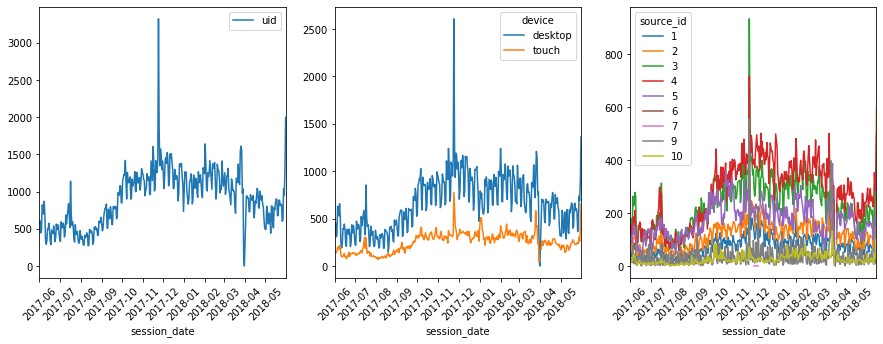

In [12]:
#построим графики по метрике DAU (Dayly Active Users).
#первый график - общий, второй - с разбивкой по устройствам, третий - с разбивкой по источнику
plt.subplots(figsize = (15,5))
visits.groupby(['session_date']).agg({'uid': 'nunique'}).plot(ax = plt.subplot(1,3,1))
plt.xticks(rotation=45)
(visits.groupby(['session_date','device'])
      .agg({'uid': 'nunique'})
      .pivot_table(index = 'session_date', columns = 'device', values = 'uid')
      .plot(ax = plt.subplot(1,3,2)))
plt.xticks(rotation=45)
(visits.groupby(['session_date','source_id'])
      .agg({'uid': 'nunique'})
      .pivot_table(index = 'session_date', columns = 'source_id', values = 'uid')
      .plot(ax = plt.subplot(1,3,3)))
plt.xticks(rotation=45)
plt.show()

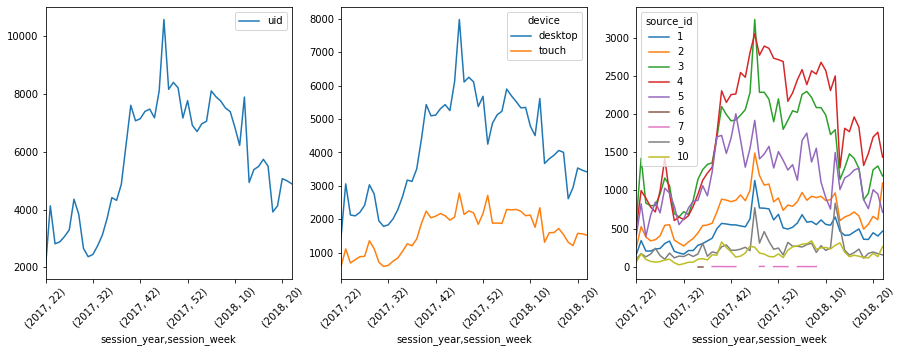

In [13]:
#построим графики по метрике WAU (Weekly Active Users)
#первый график - общий, второй - с разбивкой по устройствам, третий - с разбивкой по источнику
plt.subplots(figsize = (15,5))
visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).plot(ax = plt.subplot(1,3,1))
plt.xticks(rotation=45)
(visits.groupby(['session_year', 'session_week','device'])
      .agg({'uid': 'nunique'})
      .pivot_table( index = ['session_year', 'session_week'], columns = 'device', values = 'uid')
      .plot(ax = plt.subplot(1,3,2)))
plt.xticks(rotation=45)
(visits.groupby(['session_year', 'session_week','source_id'])
      .agg({'uid': 'nunique'})
      .pivot_table( index = ['session_year', 'session_week'], columns = 'source_id', values = 'uid')
      .plot(ax = plt.subplot(1,3,3)))
plt.xticks(rotation=45)
plt.show()

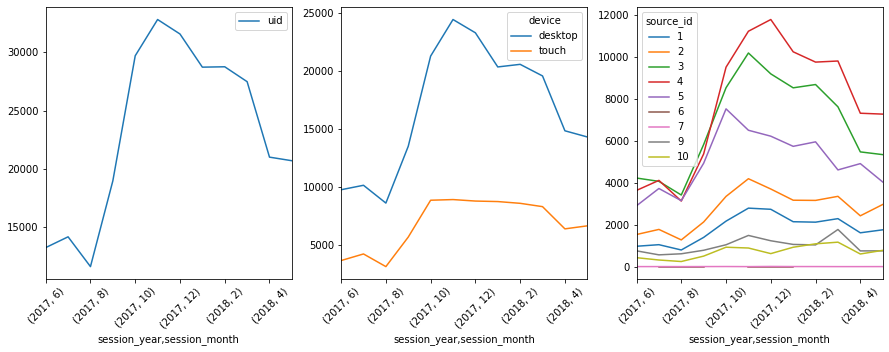

In [14]:
#построим графики по метрике MAU (Monthly Active Users)
#первый график - общий, второй - с разбивкой по устройствам, третий - с разбивкой по источнику
plt.subplots(figsize = (15,5))
visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).plot(ax = plt.subplot(1,3,1))
plt.xticks(rotation=45)
(visits.groupby(['session_year', 'session_month','device'])
      .agg({'uid': 'nunique'})
      .pivot_table( index = ['session_year', 'session_month'], columns = 'device', values = 'uid')
      .plot(ax = plt.subplot(1,3,2)))
plt.xticks(rotation=45)
(visits.groupby(['session_year', 'session_month','source_id'])
      .agg({'uid': 'nunique'})
      .pivot_table( index = ['session_year', 'session_month'], columns = 'source_id', values = 'uid')
      .plot(ax = plt.subplot(1,3,3)))
plt.xticks(rotation=45)
plt.show()

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> В этом разделе все хорошо. ты верно рассчитала показатели посетителей и особенно мне понравились графики динамики посещений в зависимости от времени. таким образом можно проанализировать сезонность. разделение на категории desktop и touch - еще один плюс в твою копилку

Пользователи заходят с desktop версии в основном
По источникам наибольшее количество пользователей пришло с источников: 4,3,5

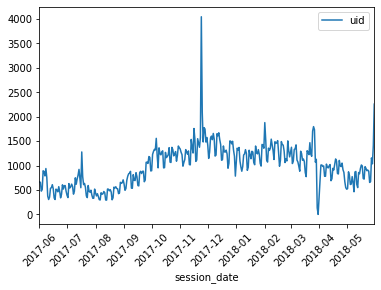

In [15]:
#Сколько сессий в день?

visits.groupby('session_date').agg({'uid': 'count'}).plot()
plt.xticks(rotation=45)
plt.show() 

In [16]:
sessions = visits.groupby('session_date').agg({'uid': 'count'})
sessions.describe()

,uid
count,364.000000
mean,987.362637
std,418.994796
min,1.000000
25%,635.500000
50%,1003.000000
75%,1280.000000
max,4042.000000


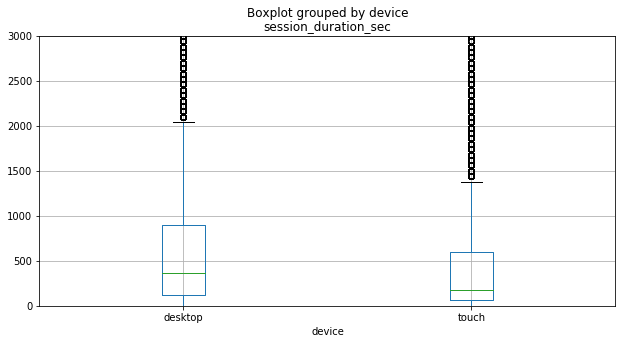

In [17]:
#Сколько длится одна сессия? 
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
visits.boxplot('session_duration_sec', by = 'device', figsize = (10, 5))
plt.ylim (0, 3000)
plt.show()

In [18]:
#Сколько длится одна сессия? 
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_sec, dtype: float64

Количество сессий в большинстве случаев равно 1003 в день, длительность сессии составляет 300 сек.

<div style="border:solid brown 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='brown'> Во первых, комментарии и пояснения к своим действиям надо писать в markdown ячейках. Во вторых, метрика mean не совсем корректна в данном вопросе, слишком чувствительна к выбросам. Подумай над тем, какую метрику взять

In [19]:
#сделаем срез по количеству сессий на каждой из платформ
session_by_device = visits.groupby(['session_year', 'session_month', 'device'])\
                          .agg({'uid': 'nunique'})
session_by_device

uid
session_year session_month device        
2017         6             desktop   9761
                           touch     3655
             7             desktop  10145
                           touch     4223
             8             desktop   8611
                           touch     3132
             9             desktop  13509
                           touch     5679
             10            desktop  21286
                           touch     8856
             11            desktop  24439
                           touch     8913
             12            desktop  23294
                           touch     8785
2018         1             desktop  20350
                           touch     8741
             2             desktop  20574
                           touch     8590
             3             desktop  19574
                           touch     8303
             4             desktop  14844
                           touch     6387
             5             desktop  14312
                           touch     6647

In [20]:
#Как часто люди возвращаются?
#sticky factor = DAU/MAU

sticky_factor = round((dau_total / mau_total)*100)
print('повторные визиты пользователей в течение месяца:', sticky_factor)

повторные визиты пользователей в течение месяца: uid    4.0
dtype: float64


In [21]:
#добавим в таблицу дату первой активности
#удалим в датафрейме visits ненужные нам столбцы
visits = visits.drop(['end_ts', 'session_week', 'session_month', 'session_year', 'session_duration_sec'], axis=1)
first_session_date = visits.groupby(['uid'])['session_date'].min()
first_session_date.name = 'first_session_date'
visits = visits.merge(first_session_date, on='uid')
visits.head()

,device,source_id,start_ts,uid,session_date,first_session_date
0,touch,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-20
1,desktop,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19
2,touch,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01
3,desktop,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-03-09
4,desktop,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-09


In [22]:
#выделим месяц первой активности
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')
visits['last_session_month'] = visits['session_date'].astype('datetime64[M]')

visits.head()

,device,source_id,start_ts,uid,session_date,first_session_date,first_session_month,last_session_month
0,touch,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-20,2017-12-01,2017-12-01
1,desktop,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01,2018-02-01
2,touch,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-07-01,2017-07-01
3,desktop,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-03-09,2018-03-01,2018-05-01
4,desktop,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-09,2018-03-01,2018-03-01


In [23]:
#найдем лайфтайм когорты
visits['cohort_lifetime'] = visits['last_session_month'] - visits['first_session_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)


In [24]:
#Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:
cohorts = visits.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head(10)

,first_session_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
5,2017-06-01,5,947
6,2017-06-01,6,809
7,2017-06-01,7,766
8,2017-06-01,8,694
9,2017-06-01,9,674


In [25]:
#Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
#Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count,on='first_session_month')
print(initial_users_count)

   first_session_month  cohort_users
0           2017-06-01         13259
12          2017-07-01         13140
23          2017-08-01         10181
33          2017-09-01         16704
42          2017-10-01         25977
50          2017-11-01         27248
57          2017-12-01         25268
63          2018-01-01         22624
68          2018-02-01         22197
72          2018-03-01         20589
75          2018-04-01         15709
77          2018-05-01         15273


Активность начинает расти с сентября. 6 месяцев -с октября по март- значительная активность (концентрация на внутригородских развлечениях и три больших праздника - Новый год, 23 февраля, 8 марта). 

In [26]:
#рассчитаем Retention Rate
#Разделим количество активных пользователей в каждом месяце на исходное число пользователей в когорте:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [27]:
#Построим сводную таблицу и создадим тепловую карту:
retention_pivot = cohorts.pivot_table(index='first_session_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


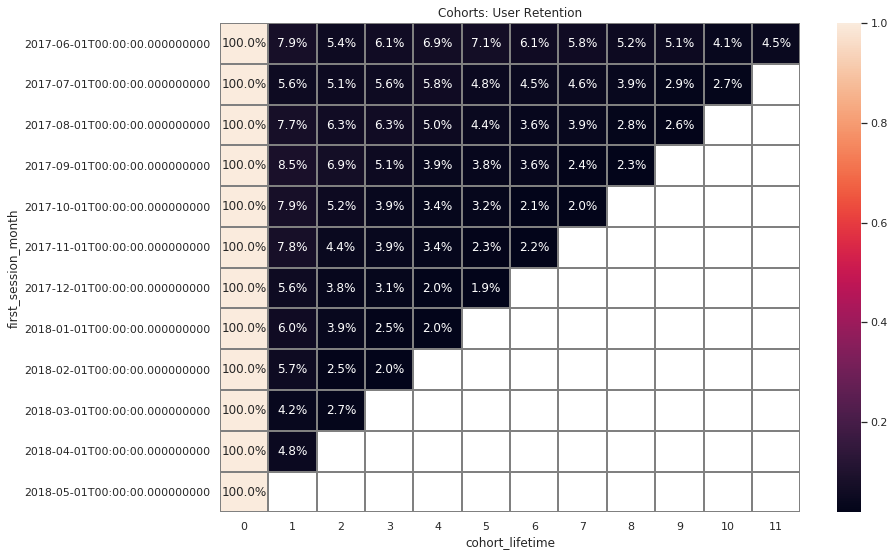

In [28]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')

Retention rate постоянно снижается - это видно с каждой когортой. Надо больше работать над удержанием клиентов.

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Всё верно рассчитано

In [29]:
#добавим в таблицу orders колонки с указанием дня и месяца

orders['orders_month'] = orders['buy_ts'].dt.month
orders['orders_year'] = orders['buy_ts'].dt.year
orders['orders_date'] = orders['buy_ts'].dt.date
orders.head(5)


,buy_ts,revenue,uid,orders_month,orders_year,orders_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017,2017-06-01


In [30]:
#Когда люди начинают покупать?

#найдем сколько времени проходит от начала первой зарегистрированной сессии до первой покупки
first_activity = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_buy = orders.groupby(['uid'])['buy_ts'].min().reset_index()
orders_new = (first_buy.merge(first_activity, on = 'uid')
                .rename(columns = {'start_ts': 'first_activity', 'buy_ts': 'first_buy'}))

orders_new['time_to_buy'] = ((orders_new['first_buy'] - orders_new['first_activity']).dt.total_seconds())/60

print('среднее время до покупки:', int(orders_new['time_to_buy'].median()),'минут')

среднее время до покупки: 16 минут


<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Хорошо, метрику среднего подобрала подходящую

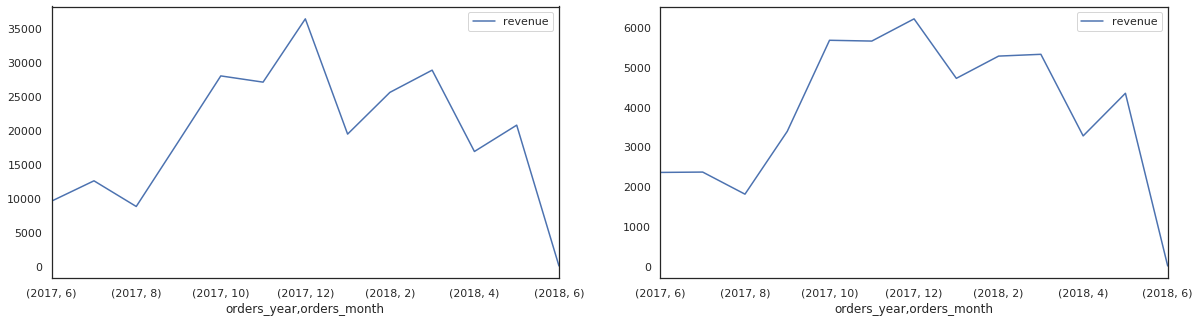

In [31]:
#сумма и количество покупок в месяц:

plt.subplots(figsize = (20,5))
orders.groupby(['orders_year', 'orders_month']).agg({'revenue': 'sum'}).plot(ax = plt.subplot(1,2,1))

orders.groupby(['orders_year', 'orders_month']).agg({'revenue': 'count'}).plot(ax = plt.subplot(1,2,2))

plt.show()
#как и количество пользователей, покупки значительно растут с октября до Нового года, затем поддерживается высокий 
#уровень до марта, с апреля уровень покупок снижается значительно 


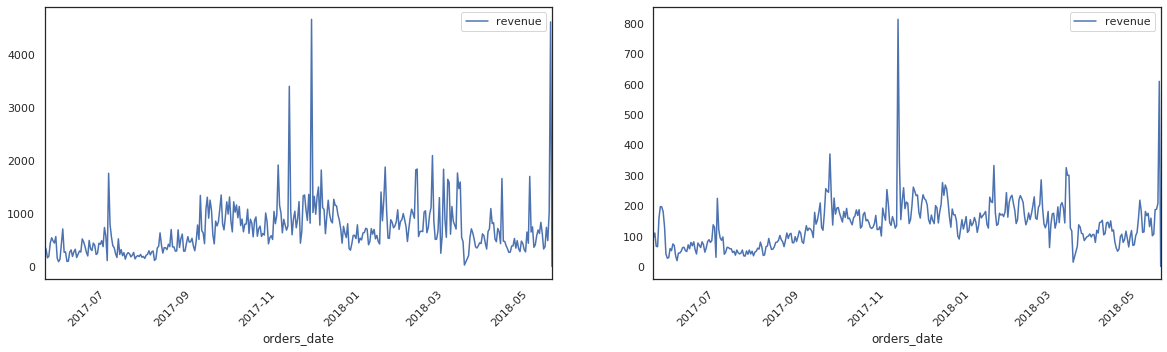

In [32]:
#сумма и количество покупок в день:

plt.subplots(figsize = (20,5))
orders.groupby('orders_date').agg({'revenue': 'sum'}).plot(ax = plt.subplot(1,2,1))
plt.xticks(rotation=45)
orders.groupby('orders_date').agg({'revenue': 'count'}).plot(ax = plt.subplot(1,2,2))
plt.xticks(rotation=45)
plt.show()

In [33]:
#Какой средний чек?
#Для каждого клиента получим дату его первого заказа
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min() 
first_order_date_by_customers.name = 'first_order_date'
orders = orders.join(first_order_date_by_customers,on='uid')
orders.head(5)

,buy_ts,revenue,uid,orders_month,orders_year,orders_date,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017,2017-06-01,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017,2017-06-01,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017,2017-06-01,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017,2017-06-01,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017,2017-06-01,2017-06-01 07:58:00


In [34]:
#выделим месяцы из столбцов buy_ts и first_order_date
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')


In [35]:
#Когортой станет столбец first_order_month — месяц, в котором был сделан первый заказ. 
#Сгруппируем данные по этому столбцу и оценим показатели каждой когорты.
cohort_grouped = orders.groupby('first_order_month').agg({'uid':'nunique','revenue':'sum'})
print(cohort_grouped)

                    uid   revenue
first_order_month                
2017-06-01         2023  24031.69
2017-07-01         1923  16127.92
2017-08-01         1370  11606.26
2017-09-01         2581  34676.32
2017-10-01         4340  27603.45
2017-11-01         4081  26098.99
2017-12-01         4383  33485.74
2018-01-01         3373  16663.13
2018-02-01         3651  16750.50
2018-03-01         3533  19273.41
2018-04-01         2276  11810.61
2018-05-01         2988  13925.76
2018-06-01            1      3.42


In [36]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_by_cohorts.head(10)

revenue   uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2023
                  2017-07-01    981.82    61
                  2017-08-01    885.34    50
                  2017-09-01   1931.30    54
                  2017-10-01   2068.58    88
                  2017-11-01   1487.92    67
                  2017-12-01   1922.74    62
                  2018-01-01   1176.56    47
                  2018-02-01   1119.15    58
                  2018-03-01   1225.51    45

In [37]:
#найдем средний чек покупателя
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts

revenue   uid  revenue_per_user
first_order_month order_month                                  
2017-06-01        2017-06-01    9557.49  2023          4.724414
                  2017-07-01     981.82    61         16.095410
                  2017-08-01     885.34    50         17.706800
                  2017-09-01    1931.30    54         35.764815
                  2017-10-01    2068.58    88         23.506591
...                                 ...   ...               ...
2018-03-01        2018-05-01    1114.87    58         19.221897
2018-04-01        2018-04-01   10600.69  2276          4.657597
                  2018-05-01    1209.92    69         17.535072
2018-05-01        2018-05-01   13925.76  2988          4.660562
2018-06-01        2018-06-01       3.42     1          3.420000

[79 rows x 3 columns]

In [38]:
#найдем средний чек покупателя
orders_grouped_by_cohorts.pivot_table(index = 'order_month', values = 'revenue_per_user', aggfunc = 'sum')
#Средний чек растет с начала "активного сезона" - в сентябре, значительно увеличивается в декабре (в три раза), 
#держится на уровне в 2 раза больше в период февраль - май

,revenue_per_user
order_month,
2017-06-01,4.724414
2017-07-01,22.105628
2017-08-01,35.379664
2017-09-01,73.594102
2017-10-01,73.336123
2017-11-01,71.216189
2017-12-01,213.329714
2018-01-01,89.626850
2018-02-01,133.831534


In [39]:
#Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, 
#как изменяется средний чек с течением времени:
orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean')
#средний чек стабильно увеличивается на 2й месяц, пик затрат будет в периоде 3-7 месяца

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> И здесь результаты корректные. Так держать!

#### Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

In [40]:
#Сколько денег потратили? Всего / на каждый источник / по времени
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.pivot_table(index = ['month'], columns = 'source_id', values = 'costs')

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,37.520333,80.912667,257.721667,117.160000,87.204000,9.507333,10.474000
2017-07-01,34.609032,75.261613,247.560323,113.862258,96.714194,9.759355,10.639355
2017-08-01,30.703548,58.420968,198.178710,103.785806,70.492903,8.030000,7.502258
2017-09-01,50.067000,99.522000,332.118333,173.075333,128.304667,13.854000,15.355667
2017-10-01,74.701613,156.290323,507.652903,207.123871,186.045161,19.658387,20.233548
2017-11-01,81.505333,174.922667,567.511333,179.627333,210.844667,22.772667,26.412000
2017-12-01,75.522581,157.993548,523.210323,247.757097,189.436129,21.225161,20.834194
2018-01-01,70.521935,134.120645,477.702581,188.154516,173.274839,17.650323,19.817742
2018-02-01,78.731429,159.797857,508.162857,203.998571,181.118214,19.696429,17.174286


In [41]:
# сколько потратили на маркетинг по рекламным источникам:
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


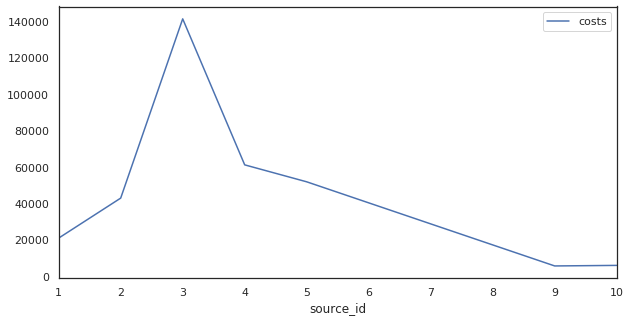

In [42]:
# сколько потратили на маркетинг по рекламным источникам:
costs.groupby(['source_id']).agg({'costs': 'sum'}).plot(figsize = (10,5))
plt.show()
#больше всего потратили на 3 рекламный источник

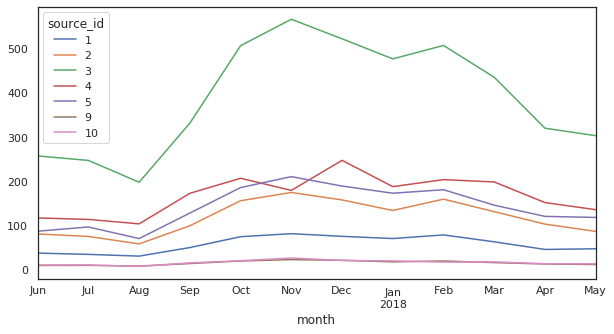

In [43]:
# сколько потратили на маркетинг по рекламным источникам, в месяц:
costs.pivot_table(index = ['month'], columns = 'source_id', values = 'costs').round(2).plot(figsize = (10,5))

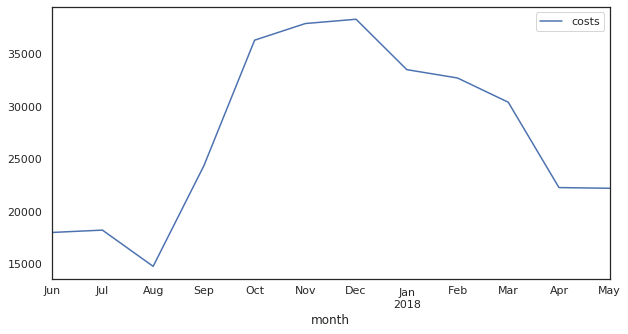

In [44]:
# сколько потратили на маркетинг по месяцам, всего:
costs_total = costs.groupby(['month']).agg({'costs': 'sum'}).plot(figsize = (10,5))
plt.show()

CAC (от англ. customer acquisition cost) — стоимость привлечения клиента. 
Сумма денег, во сколько обходится новый клиент компании.
Экономика одного покупателя сходится, если LTV больше CAC.


In [45]:
#Сколько стоило привлечение одного покупателя из каждого источника?(САС)

# считаем расходы за месяц
monthly_costs = costs.groupby(['month','source_id']).agg({'costs': 'sum'})
monthly_costs

costs
month      source_id         
2017-06-01 1          1125.61
           2          2427.38
           3          7731.65
           4          3514.80
           5          2616.12
...                       ...
2018-05-01 3          9411.42
           4          4214.21
           5          3669.56
           9           362.17
           10          409.86

[84 rows x 1 columns]

In [46]:
#Для каждого пользователя определим из visits дату и источник первого посещения
first_visits_source_id = visits.query('session_date == first_session_date')
first_visits_source_id = first_visits_source_id.drop(['device','start_ts',
                                                      'session_date','first_session_month',
                                                      'last_session_month','cohort_lifetime'], axis=1)
                         
first_visits_source_id.head(5)

,source_id,uid,first_session_date
0,4,16879256277535980062,2017-12-20
1,2,104060357244891740,2018-02-19
2,5,7459035603376831527,2017-07-01
4,4,16174680259334210214,2018-03-09
5,3,9969694820036681168,2017-12-27


In [47]:
first_visits_source_id['first_session_date'] = pd.to_datetime(first_visits_source_id['first_session_date'], format="%Y-%m-%d %H:%M")
first_visits_source_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239740 entries, 0 to 359399
Data columns (total 3 columns):
source_id             239740 non-null int64
uid                   239740 non-null uint64
first_session_date    239740 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), uint64(1)
memory usage: 7.3 MB


In [48]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [49]:
#строим профили юзеров
users = (visits.sort_values(by = ['uid', 'start_ts'])
               .groupby('uid')
               .agg({'start_ts': 'first', 'source_id': 'first', 'device': 'first'})
               .rename(columns = {'start_ts':  'acquisition_ts'}))

users['acquisition_date'] = users['acquisition_ts'].dt.date
users['acquisition_month'] = users['acquisition_ts'].astype('datetime64[M]')    
costs.rename(columns={'dt': 'acquisition_date'}, inplace=True)
users = (users.reset_index()
              .set_index(['source_id', 'acquisition_date'])
              .join(costs.set_index(['source_id', 'acquisition_date']), how = 'left'))

In [50]:
#добавляем стоимость приобретения индивидуального пользователя
user_cost = (users.groupby(['source_id', 'acquisition_date'])
                  .agg({'device': 'count', 'costs': 'max'})
                  .rename(columns = {'device': 'users'})) 
users.head()

uid      acquisition_ts   device  \
source_id acquisition_date                                                     
1         2017-06-01         469568501030474895 2017-06-01 05:30:00  desktop   
          2017-06-01         618675438905551322 2017-06-01 02:37:00    touch   
          2017-06-01        1074355127080856382 2017-06-01 09:21:00  desktop   
          2017-06-01        1292867924428534308 2017-06-01 12:53:00  desktop   
          2017-06-01        1548840741623289234 2017-06-01 01:18:00  desktop   

                           acquisition_month  costs      month  
source_id acquisition_date                                      
1         2017-06-01              2017-06-01   75.2 2017-06-01  
          2017-06-01              2017-06-01   75.2 2017-06-01  
          2017-06-01              2017-06-01   75.2 2017-06-01  
          2017-06-01              2017-06-01   75.2 2017-06-01  
          2017-06-01              2017-06-01   75.2 2017-06-01

In [51]:
#посчитаем стоимость привлечения одного пользователя:

user_cost['acquisition_cost'] = user_cost['costs'] / user_cost['users']
users = users.join(user_cost['acquisition_cost'], how = 'left').reset_index()

users = users.set_index('uid')[['acquisition_ts', 'acquisition_date', 'acquisition_month',
                               'source_id', 'device', 'acquisition_cost']]
#платящий пользователь или нет
users = users.join(orders.groupby('uid').agg({'buy_ts': 'min'}).rename(columns = {'buy_ts': 'first_purchase_dt'}), how = 'left')
users['payer'] = ~users['first_purchase_dt'].isna()

In [52]:
users

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,first_purchase_dt,payer
uid,,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.600000,2017-09-11 00:06:00,True
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.600000,NaT,False
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.600000,2017-06-01 09:23:00,True
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.600000,2017-06-01 16:47:00,True
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.600000,NaT,False
...,...,...,...,...,...,...,...,...
17550479715346067160,2018-05-31 22:00:00,2018-05-31,2018-05-01,10,touch,0.177778,NaT,False
17715613363403416471,2018-05-31 03:30:00,2018-05-31,2018-05-01,10,desktop,0.177778,NaT,False
18076428844159112818,2018-05-31 17:47:00,2018-05-31,2018-05-01,10,touch,0.177778,NaT,False


In [53]:
#посчитаем когорты и CAC(стоимость привлечения клиента)
cohorts_new = (users.groupby('acquisition_month')
                    .agg({'payer': 'sum', 'acquisition_cost': 'sum'})
                    .rename(columns = {'payer': 'cohort_size'}))

cohorts_new['cac'] = cohorts_new['acquisition_cost'] / cohorts_new['cohort_size']

In [54]:
#считаем LTV
ltv = orders.set_index('uid').join(users, how = 'left')[['acquisition_month', 'first_order_month', 'revenue']]
ltv['age_month'] = ((ltv['first_order_month'] - ltv['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')
ltv = ltv.groupby(['acquisition_month', 'age_month']).agg({'revenue': 'sum'})
ltv = pd.pivot_table(ltv, index = 'acquisition_month', columns = 'age_month', values = 'revenue', aggfunc = 'sum')
ltv = ltv.cumsum(axis = 1)
ltv = cohorts_new[['cohort_size']].join(ltv)
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = ['cohort_size']) #делим все ячейки в рядах на соответствующую когорту
cohorts_new[['cohort_size', 'cac']].join(ltv[range(0, 6)].fillna(''))

,cohort_size,cac,0,1,2,3,4,5
acquisition_month,,,,,,,,
2017-06-01,2923.0,6.163189,8.221584,9.705522,9.9641,11.498,11.9593,12.6799
2017-07-01,2458.0,7.416928,4.796733,5.404894,5.86089,6.22083,6.47803,6.67919
2017-08-01,1721.0,8.593359,5.436124,5.876130,6.17225,6.48016,6.63342,6.75424
2017-09-01,3058.0,7.966109,9.259166,10.039735,10.4485,10.6071,10.6927,10.8016
2017-10-01,4678.0,7.764617,4.804168,5.359927,5.5254,5.64612,5.78132,5.87445
2017-11-01,4262.0,8.894388,4.453487,5.132485,5.28225,5.3996,5.55704,5.66005
2017-12-01,4074.0,9.402560,6.877273,7.173795,7.3077,7.51409,7.57157,7.64797
2018-01-01,3119.0,10.746560,3.954463,4.330725,4.47783,4.53218,4.66394,
2018-02-01,3186.0,10.266073,3.979256,4.476877,4.61779,4.72734,,


In [55]:
#LTV с разбивкой по УСТРОЙСТВУ

#посчитаем когорты и CAC(стоимость привлечения клиента)
cohorts_new = (users.groupby('device')
                    .agg({'payer': 'sum', 'acquisition_cost': 'sum'})
                    .rename(columns = {'payer': 'cohort_size'}))

cohorts_new['cac'] = cohorts_new['acquisition_cost'] / cohorts_new['cohort_size']

#считаем LTV
ltv = orders.set_index('uid').join(users, how = 'left')[['acquisition_month', 'first_order_month', 'revenue', 'device']]
ltv['age_month'] = ((ltv['first_order_month'] - ltv['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')
ltv = ltv.groupby(['device', 'age_month']).agg({'revenue': 'sum'})
ltv = pd.pivot_table(ltv, index = 'device', columns = 'age_month', values = 'revenue', aggfunc = 'sum')
ltv = ltv.cumsum(axis = 1)
ltv = cohorts_new[['cohort_size']].join(ltv)
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = ['cohort_size']) #делим все ячейки в рядах на соответствующую когорту
cohorts_new[['cohort_size', 'cac']].join(ltv[range(0, 6)].fillna(''))

,cohort_size,cac,0,1,2,3,4,5
device,,,,,,,,
desktop,29211.0,8.047165,5.883043,6.427173,6.603210,6.813215,6.933415,7.057778
touch,7312.0,12.855680,3.918786,4.442715,4.657246,5.022841,5.151867,5.246935


In [56]:
#LTV с разбивкой по рекламному ИСТОЧНИКУ

#посчитаем когорты и CAC(стоимость привлечения клиента)
cohorts_new = (users.groupby('source_id')
                    .agg({'payer': 'sum', 'acquisition_cost': 'sum'})
                    .rename(columns = {'payer': 'cohort_size'}))

cohorts_new['cac'] = cohorts_new['acquisition_cost'] / cohorts_new['cohort_size']

#считаем LTV
ltv = orders.set_index('uid').join(users, how = 'left')[['acquisition_month', 'first_order_month', 'revenue', 'source_id']]
ltv['age_month'] = ((ltv['first_order_month'] - ltv['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')
ltv = ltv.groupby(['source_id', 'age_month']).agg({'revenue': 'sum'})
ltv = pd.pivot_table(ltv, index = 'source_id', columns = 'age_month', values = 'revenue', aggfunc = 'sum')
ltv = ltv.cumsum(axis = 1)
ltv = cohorts_new[['cohort_size']].join(ltv)
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = ['cohort_size']) #делим все ячейки в рядах на соответствующую когорту
ltv_source = cohorts_new[['cohort_size', 'cac']].join(ltv[range(0, 6)].fillna(''))

In [57]:
ltv_source

,cohort_size,cac,0,1,2,3,4,5
source_id,,,,,,,,
1,2899.0,7.186364,7.77808,9.15932,9.59153,9.78376,9.8774,10.0054
2,3506.0,12.209367,10.7503,11.7102,11.9271,12.7906,13.0449,13.1811
3,10473.0,13.493901,4.08829,4.5787,4.72477,4.86073,4.99922,5.06434
4,10296.0,5.931779,4.23103,4.61015,4.7752,5.03871,5.12556,5.33935
5,6931.0,7.467378,6.75049,7.10441,7.23564,7.3319,7.38546,7.43972
6,0.0,NaN,,,,,,
7,1.0,0.000000,1.22,,,,,
9,1088.0,5.013254,3.10932,3.64949,4.06215,4.39595,4.78078,4.93162
10,1329.0,4.380075,2.79406,3.00147,3.08428,3.12614,3.24418,3.28619


уберем из расчетов 6 и 7 источники, по ним недостаточно данных для анализа

In [58]:
ltv_source = ltv_source.query('source_id != "6" and source_id != "7"')
ltv_source

,cohort_size,cac,0,1,2,3,4,5
source_id,,,,,,,,
1,2899.0,7.186364,7.77808,9.15932,9.59153,9.78376,9.8774,10.0054
2,3506.0,12.209367,10.7503,11.7102,11.9271,12.7906,13.0449,13.1811
3,10473.0,13.493901,4.08829,4.5787,4.72477,4.86073,4.99922,5.06434
4,10296.0,5.931779,4.23103,4.61015,4.7752,5.03871,5.12556,5.33935
5,6931.0,7.467378,6.75049,7.10441,7.23564,7.3319,7.38546,7.43972
9,1088.0,5.013254,3.10932,3.64949,4.06215,4.39595,4.78078,4.93162
10,1329.0,4.380075,2.79406,3.00147,3.08428,3.12614,3.24418,3.28619


In [59]:
#Рассчитаем ROMI: поделим LTV на CAC.
roi = ltv_source.div(ltv_source['cac'], axis = 0).drop(columns = ['cohort_size', 'cac']).fillna('')
roi

,0,1,2,3,4,5
source_id,,,,,,
1,1.082338,1.274542,1.334684,1.361433,1.374464,1.392273
2,0.880497,0.959119,0.976877,1.047602,1.068435,1.079591
3,0.302973,0.339316,0.350141,0.360217,0.370480,0.375306
4,0.713282,0.777195,0.805020,0.849443,0.864084,0.900127
5,0.903997,0.951393,0.968967,0.981857,0.989030,0.996296
9,0.620220,0.727967,0.810282,0.876865,0.953628,0.983716
10,0.637901,0.685255,0.704162,0.713718,0.740667,0.750258


Наиболее выгодные источники для вложений: 1, 2, 5 и 9

<div style="border:solid brown 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='brown'>А вот здесь надо будет рассчитать не по когортам, а по источникам. Чтобы посмотреть их окупаемость

### Вывод

среднее количество уникальных пользователей в день: 907
среднее количество уникальных пользователей в неделю: 5716
среднее количество уникальных пользователей в месяц: 23228

Пользователи заходят с desktop версии в основном
По источникам наибольшее количество пользователей пришло с источников: 4,3,5

среднее количество сессий - 987 в день
Увеличение идет с октября: люди вернулись с отпусков и с дач. Пик перед новогодними праздниками - покупка подарков. Следующие два пика, меньше - перед праздниками 23 февраля и 8 марта.  Сразу после 8 марта резкое снижение: билеты уже куплены, деньги на праздники потрачены. Общее постепенное снижение к лету: люди переключаются с внутригородских развлечений на поездки за город и отпуск.



повторных визитов пользователей в течение месяца - 4
среднее время до покупки: 16 минут

Средний чек на второй месяц стабильно увеличивается.
Средний чек растет с начала "активного сезона" - в сентябре, значительно увеличивается в декабре (в три раза), 
держится на уровне в 2 раза больше в период февраль - май
наиболее выгодная когорта - сентябрьская, вложения на ее привлечение окупаются быстрее всего

В среднем когорты окупаются на 8 месяц

Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?
Какие источники/платформы вы бы порекомендовали? Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?


Коэффициент удержания снижается с каждой когортой.

- для постоянных покупателей
- сервис анализа предпочтений (наподобие Яндекс.Музыки) - советы по похожим мероприятиям
- трекинг мероприятий по любимым исполнителям/организаторам с настроенными уведомлениями

Количество сессий в большинстве случаев равно 1003 в день, длительность сессии составляет 300 сек.

Наиболее выгодные источники для вложений: 1, 2, 5 и 9
Несмотря на то, что основные затраты приходятся на 3 и 4 источники, прибыль они приносят очень неравномерно. Источник 3 окупается меньше, чем наполовину.

<div style="border:solid brown 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='brown'>Итог ревью - ты проделала большую работу! Очень хорошо, но есть замечания. Как исправишь их, так сразу отправляй на повторную проверку. Я буду ждать.
Не забудь переоформить свои комментарии в коде на markdown ячейки, так твой проект будет куда легче читать и всопринимать. Удачи!

<div style="border:solid brown 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='brown'> Некоторые замечания ты учла успешно, но в плане оформления оставила всё как есть. Надо переоформить свои комментарии к коду и выводы (например, #уберем из расчетов 6 и 7 источники, по ним недостаточно данных для анализа) в отдельные markdown ячейки

#### я не поняла эту притензию по оформлению. 
вот уже который раз я оформляю проект именно так, описывая свои шаги в комментариях к коду - и только задание и выводы пишу в markdown-ячейках. раньше принимали,  первый раз такое замечание. покажите идеальный пример? - каждый комментарий к шагам в коде нужно оставлять в markdown-ячейках?
разве это причина не принимать проект? если решения верные.

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Все решения верные. Мое замечание касается улучшения читаимости отчета исследования. Но не предполагал, что с данным вопросом могут возникнуть такие сложности. Успехов в дальнейшем обучении.